# Graph 

In [1]:
from __future__ import print_function
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; } </style>"))
import matplotlib.pyplot as plt

In [2]:
from pkg.realsense import *
from pkg.kinect import *
from pkg.marker_config import *
from pkg.stereo import *

In [3]:
init_stereo()
aruco_map, dictionary = get_aruco_config()

Start streaming
Device configuration: 
	color_format: 3 
	(0:JPG, 1:NV12, 2:YUY2, 3:BGRA32)

	color_resolution: 5 
	(0:OFF, 1:720p, 2:1080p, 3:1440p, 4:1536p, 5:2160p, 6:3072p)

	depth_mode: 3 
	(0:OFF, 1:NFOV_2X2BINNED, 2:NFOV_UNBINNED,3:WFOV_2X2BINNED, 4:WFOV_UNBINNED, 5:Passive IR)

	camera_fps: 2 
	(0:5 FPS, 1:15 FPS, 2:30 FPS)

	synchronized_images_only: False 
	(True of False). Drop images if the color and depth are not synchronized

	depth_delay_off_color_usec: 0 ms. 
	Delay between the color image and the depth image

	wired_sync_mode: 0
	(0:Standalone mode, 1:Master mode, 2:Subordinate mode)

	subordinate_delay_off_master_usec: 0 ms.
	The external synchronization timing.

	disable_streaming_indicator: False 
	(True or False). Streaming indicator automatically turns on when the color or depth camera's are in use.




In [4]:
# disconnect_stereo()

# test stereo

In [5]:
kn_config, rs_config, T_c12 = calibrate_stereo(aruco_map, dictionary)

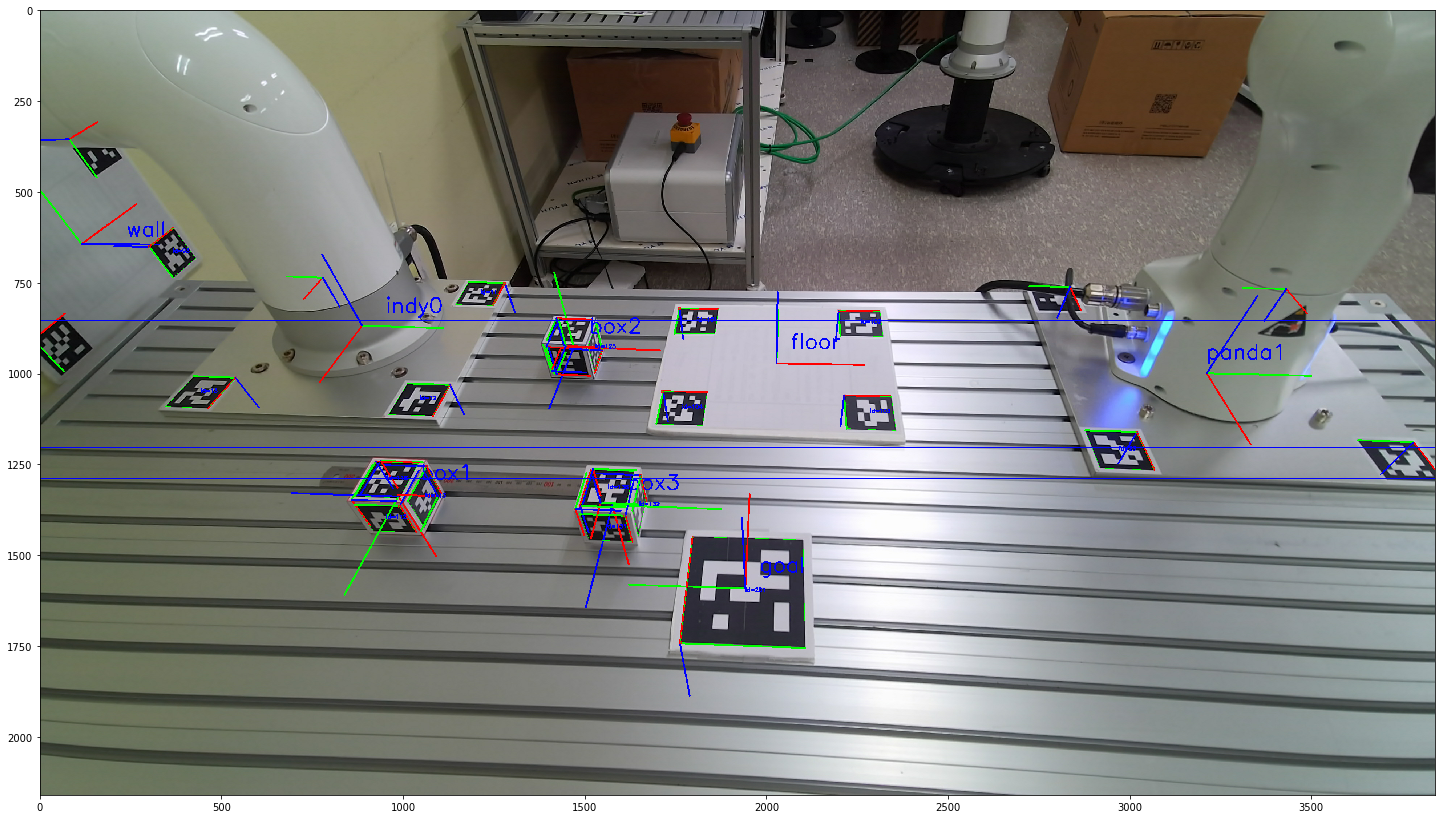

In [6]:
objectPose_dict, corner_dict, color_image, rs_image, rs_corner_dict = get_object_pose_dict_stereo(aruco_map, dictionary)
color_image_out = draw_objects(color_image.copy(), aruco_map, objectPose_dict, corner_dict, kn_config[0], kn_config[1], axis_len=0.1)
plt.figure(figsize=(25,15))
plt.imshow(color_image_out[:,:,[2,1,0]])

In [7]:
get_T_rel("floor", "box1", objectPose_dict)[:3,3]

array([-0.3442579 , -0.21609896,  0.01914388], dtype=float32)

In [8]:
get_T_rel("floor", "box2", objectPose_dict)[:3,3]

array([-0.23230174, -0.00245237,  0.02039599], dtype=float32)

In [9]:
get_T_rel("floor", "box3", objectPose_dict)[:3,3]

array([-0.14449362, -0.22052342,  0.0204629 ], dtype=float32)

In [10]:
get_T_rel("floor", "indy0", objectPose_dict)[:3,2]

array([ 0.00352295, -0.00241175,  0.99999094], dtype=float32)

In [11]:
get_T_rel("floor", "panda1", objectPose_dict)[:3,2]

array([ 0.00197256, -0.00198034,  0.99999607], dtype=float32)

In [12]:
get_T_rel("floor", "goal", objectPose_dict)[:3,3]

array([-2.0107787e-02, -2.8691104e-01,  1.8709898e-04], dtype=float32)

In [13]:
get_T_rel("box1", "box3", objectPose_dict)[:3,3]

array([-0.00122046,  0.00329021, -0.19978674], dtype=float32)

# test each

In [14]:
kn_config, rs_config, T_c12 = calibrate_stereo(aruco_map, dictionary)

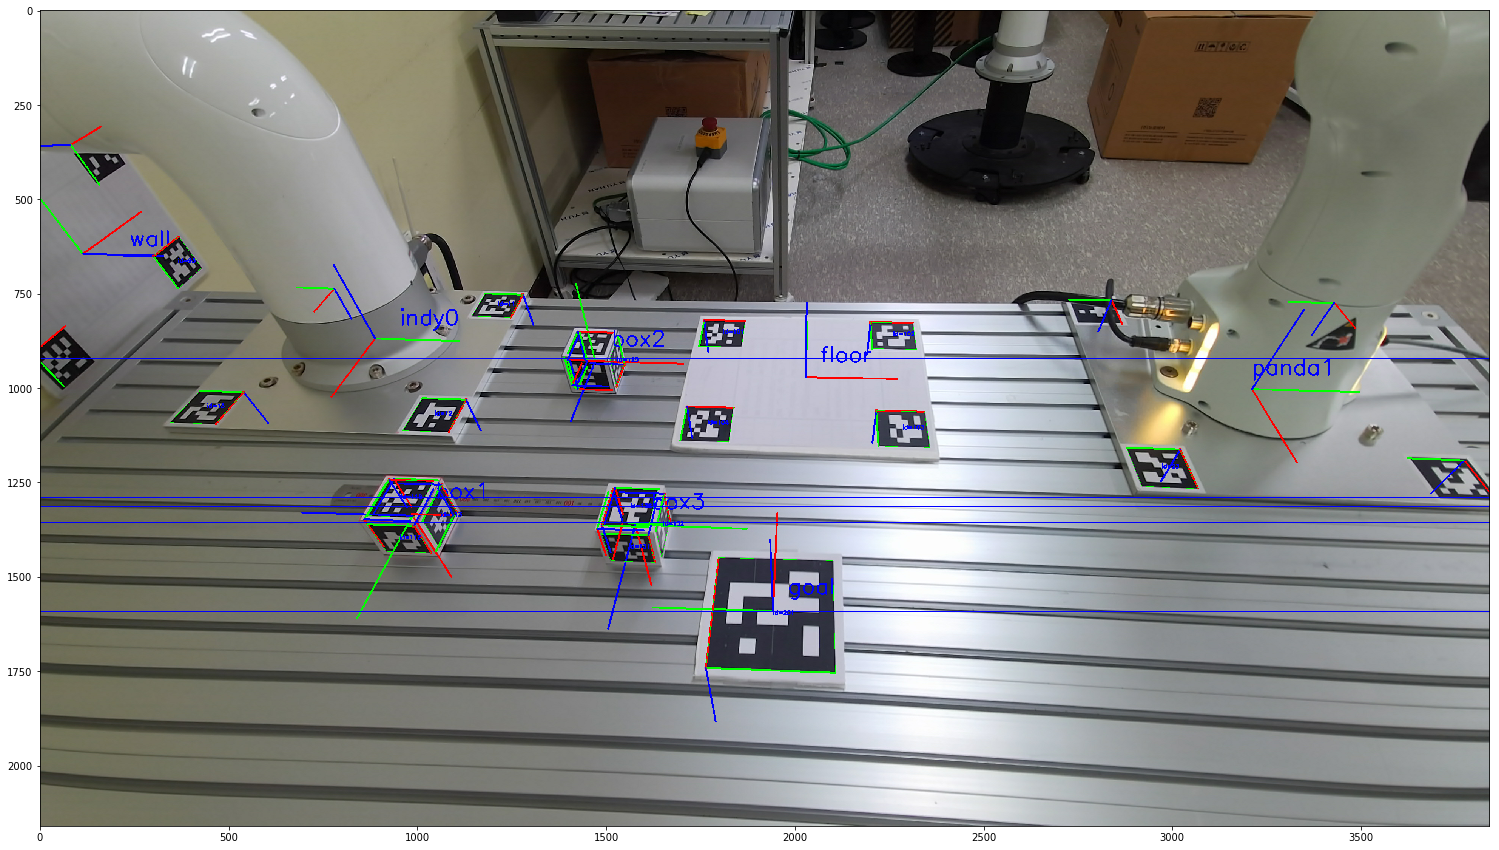

In [15]:
image_kn = get_kn_image()
objectPose_dict, corner_dict = get_object_pose_dict(image_kn, aruco_map, dictionary, *kn_config)
image_kn_objects = draw_objects(image_kn, aruco_map, objectPose_dict, corner_dict, *kn_config)
plt.figure(figsize=(30,15))
plt.imshow(image_kn_objects[:,:,[2,1,0]])

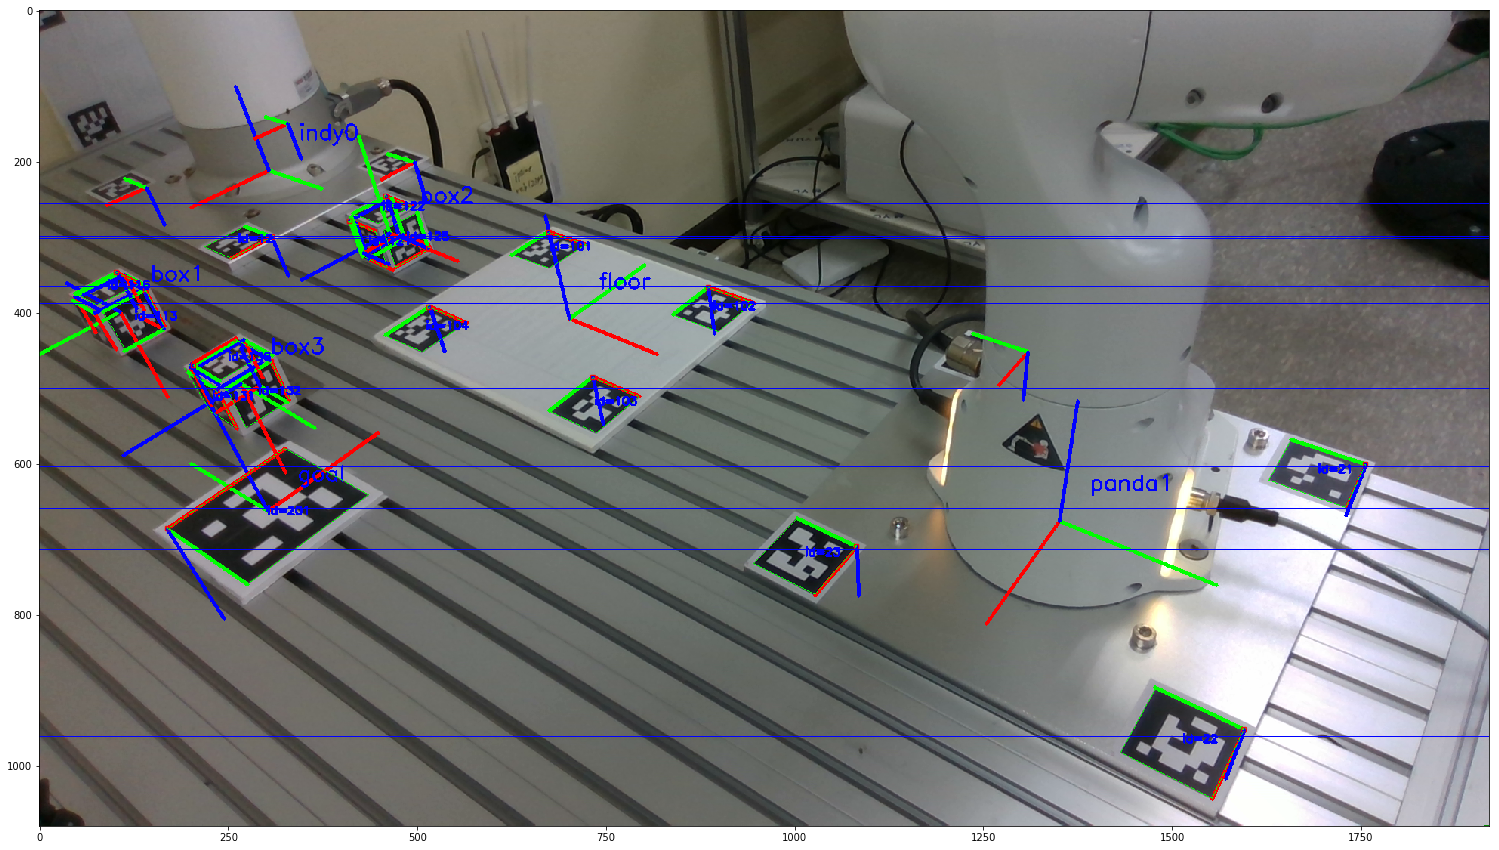

In [18]:
image_rs = get_rs_image()
objectPose_dict, corner_dict = get_object_pose_dict(image_rs, aruco_map, dictionary, *rs_config)
image_rs_objects = draw_objects(image_rs, aruco_map, objectPose_dict, corner_dict, *rs_config)
plt.figure(figsize=(30,15))
plt.imshow(image_rs_objects[:,:,[2,1,0]])